In [25]:
import pandas as pd

df = pd.read_csv('Capital_budget_final.csv')
df.describe()

Department                     Project_Name  \
count                               407                              407   
unique                               17                              406   
top     Parks and Recreation Department  BCYF Hyde Park Community Center   
freq                                 93                                2   

                                            Scope_Of_Work  \
count                                                 407   
unique                                                381   
top     Engage youth across the City to create a capit...   
freq                                                    7   

                       PM_Department   Project_Status Neighborhood  \
count                            407              407          378   
unique                            19                9           26   
top     Public Facilities Department  To Be Scheduled     Citywide   
freq                             138               88           67   

       Authorization_Existing Authorization_FY Authorization_Future  \
count                     407              407                  407   
unique                    172               82                   41   
top                      -                -                    -      
freq                      113              254                  361   

       Grant_Existing GO_Expended Capital_Year_0 CapitalYear_1  \
count             407         407            407           407   
unique             51         118            123            91   
top              -           -              -             -      
freq              348         290            245            54   

       Capital_Year_25 Grant_Expended Grant_Year_0 Grant_Year_1 GrantYear_25  \
count              407            407          407          407          407   
unique             193             34           39           29           39   
top               -              -            -            -            -      
freq                87            374          367          353          363   

       External_Funds Total_Project_Budget  
count             407                  407  
unique             21                  226  
top              -               1,000,000  
freq              385                   29

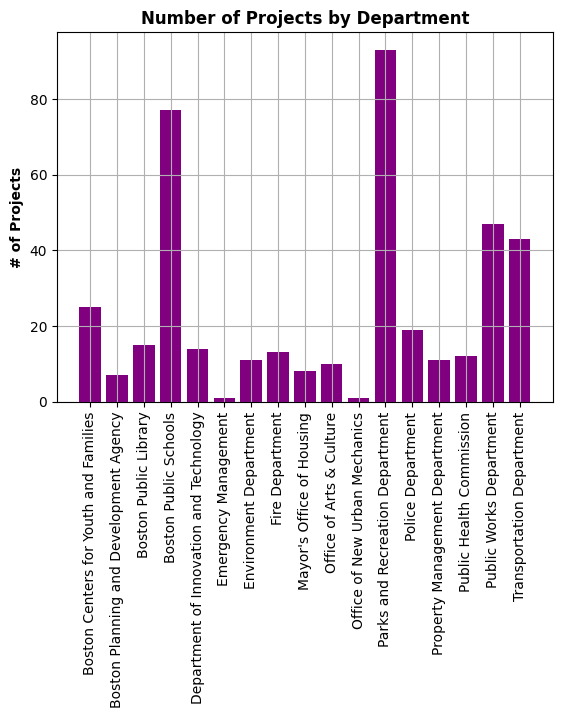

In [26]:
import numpy as np
import matplotlib.pyplot as plt

df_count = df.groupby(["Department"], as_index=False).count().rename(columns={'Project_Name':'ProjectCount'})

fig, ax = plt.subplots()
   
ax.bar(df_count["Department"], df_count["ProjectCount"], color='purple')
ax.set_ylabel('# of Projects', 
              fontweight ='bold')
ax.grid(True)
plt.xticks(rotation = 90)
ax.set_title('Number of Projects by Department', fontsize = 12, fontweight ='bold')
plt.show()

In [27]:
df_count = df["Total_Project_Budget"].str.split(",").apply(lambda numbers: ''.join(numbers))
df["Total_Project_Budget"] = df_count.astype('int')

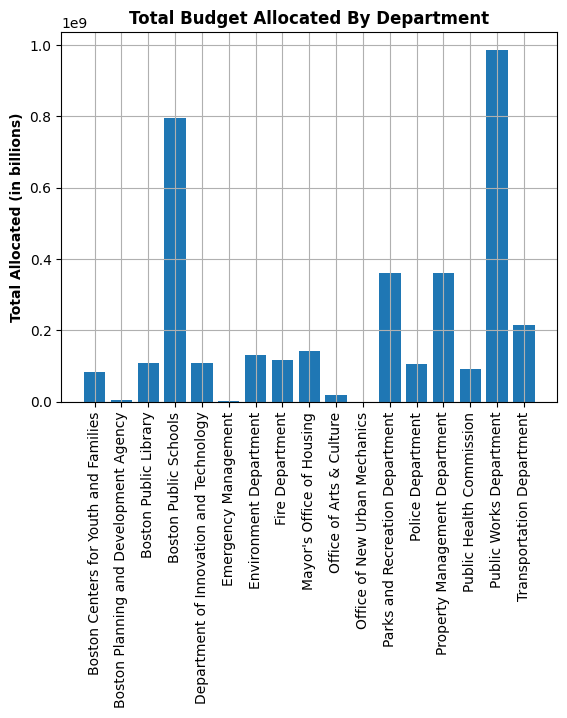

In [14]:

df_count = df[["Department", "Total_Project_Budget"]].groupby(["Department"], as_index=False).sum().rename(columns={'Total_Project_Budget':'Total_Department_Budget_Allocation'})

fig, ax = plt.subplots()
   
ax.bar(df_count["Department"], df_count["Total_Department_Budget_Allocation"])
ax.set_ylabel('Total Allocated (in billions)', 
              fontweight ='bold')
ax.grid(True)
plt.xticks(rotation = 90)
ax.set_title('Total Budget Allocated By Department', fontsize = 12, fontweight ='bold')
plt.show()

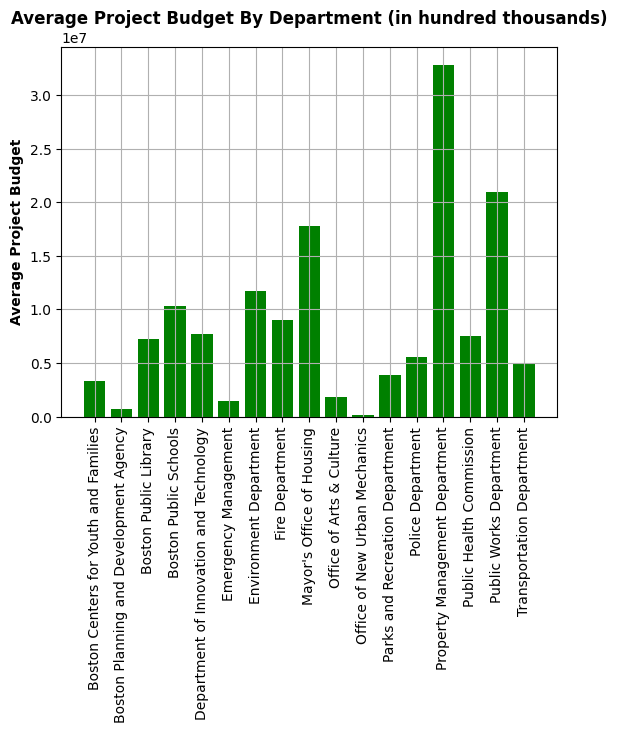

In [15]:
df_count = df[["Department", "Total_Project_Budget"]].groupby(["Department"], as_index=False).mean().rename(columns={'Total_Project_Budget':'Average_Project_Budget'})

fig, ax = plt.subplots()
   
ax.bar(df_count["Department"], df_count["Average_Project_Budget"], color='green')
ax.set_ylabel('Average Project Budget', 
              fontweight ='bold')
ax.grid(True)
plt.xticks(rotation = 90)
ax.set_title('Average Project Budget By Department (in hundred thousands)', fontsize = 12, fontweight ='bold')
plt.show()

In [28]:
df.loc[ df["Neighborhood"] == "Various neighborhoods", "Neighborhood"] = "Various Neighborhoods"

In [29]:
df_count = df[["Neighborhood", "Total_Project_Budget"]].groupby(["Neighborhood"], as_index=False).sum().rename(columns={'Total_Project_Budget':'Projects_Sum'})
print(df_count)
#df_count.to_csv("projectbudgetcount.csv")

                      Neighborhood  Projects_Sum
0                 Allston/Brighton      46360000
1                         Back Bay      58293934
2                      Bay Village       1525000
3                      Beacon Hill      26100000
4                      Charlestown     479502390
5                        Chinatown     238872172
6                         Citywide     680174651
7                       Dorchester     139578681
8                      East Boston     101632890
9                   Fenway/Kenmore     239348258
10     Financial District/Downtown     128850000
11  Government Center/Faneuil Hall     209323273
12                  Harbor Islands     134396224
13                       Hyde Park       6520000
14                   Jamaica Plain      73850000
15                        Mattapan      48821850
16                    Mission Hill       7497212
17                       North End      11975000
18                      Roslindale       8240000
19                  

In [30]:
populations = [(28621+48330), 19588, 1312, 9336, 19120, 7143, 654776, 122191, 43066, 37733, 13451, 13451, 401, 33009, 41012, 23834, 17886, 10805, 29386, 54905, (37917+5579), 29373, 7705, 31561, 50367]
df_count["Population"] = populations

In [31]:
normalized_sum = df_count["Projects_Sum"]/df_count["Population"]
df_count["Normalized_Sum"] = normalized_sum

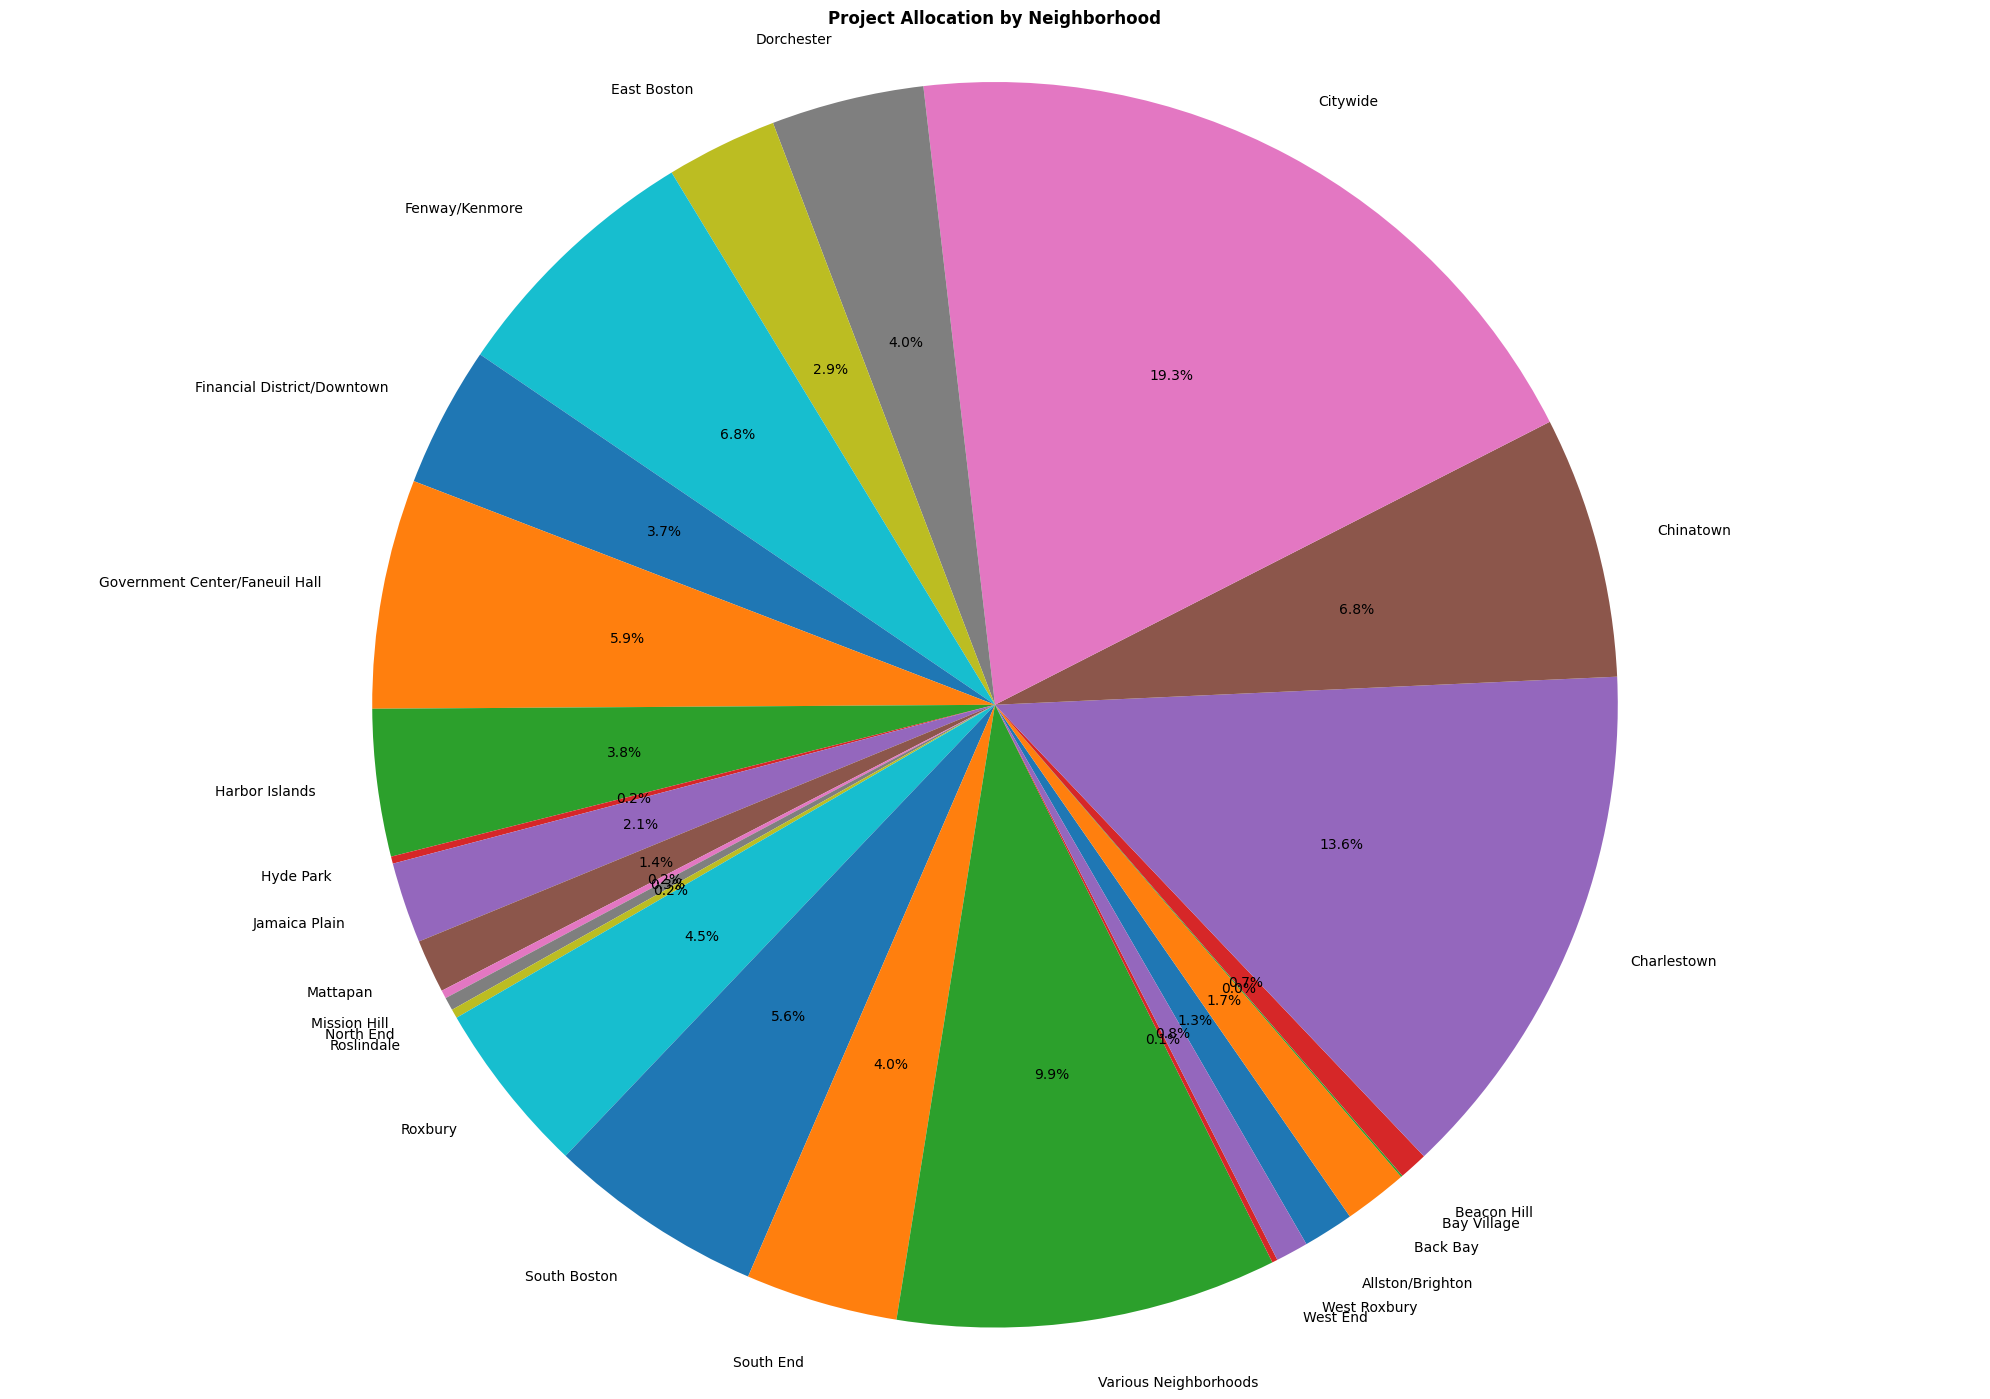

In [138]:
df_count = df[["Neighborhood", "Total_Project_Budget"]].groupby(["Neighborhood"], as_index=False).sum().rename(columns={'Total_Project_Budget':'Projects_Sum'})

labels = df_count["Neighborhood"]
total_sum = df_count["Projects_Sum"].sum()
df_count["ProjectProp"] = df_count["Projects_Sum"]/total_sum
sizes = df_count["ProjectProp"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-60)
ax1.set_title("Project Allocation by Neighborhood", fontweight ='bold')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

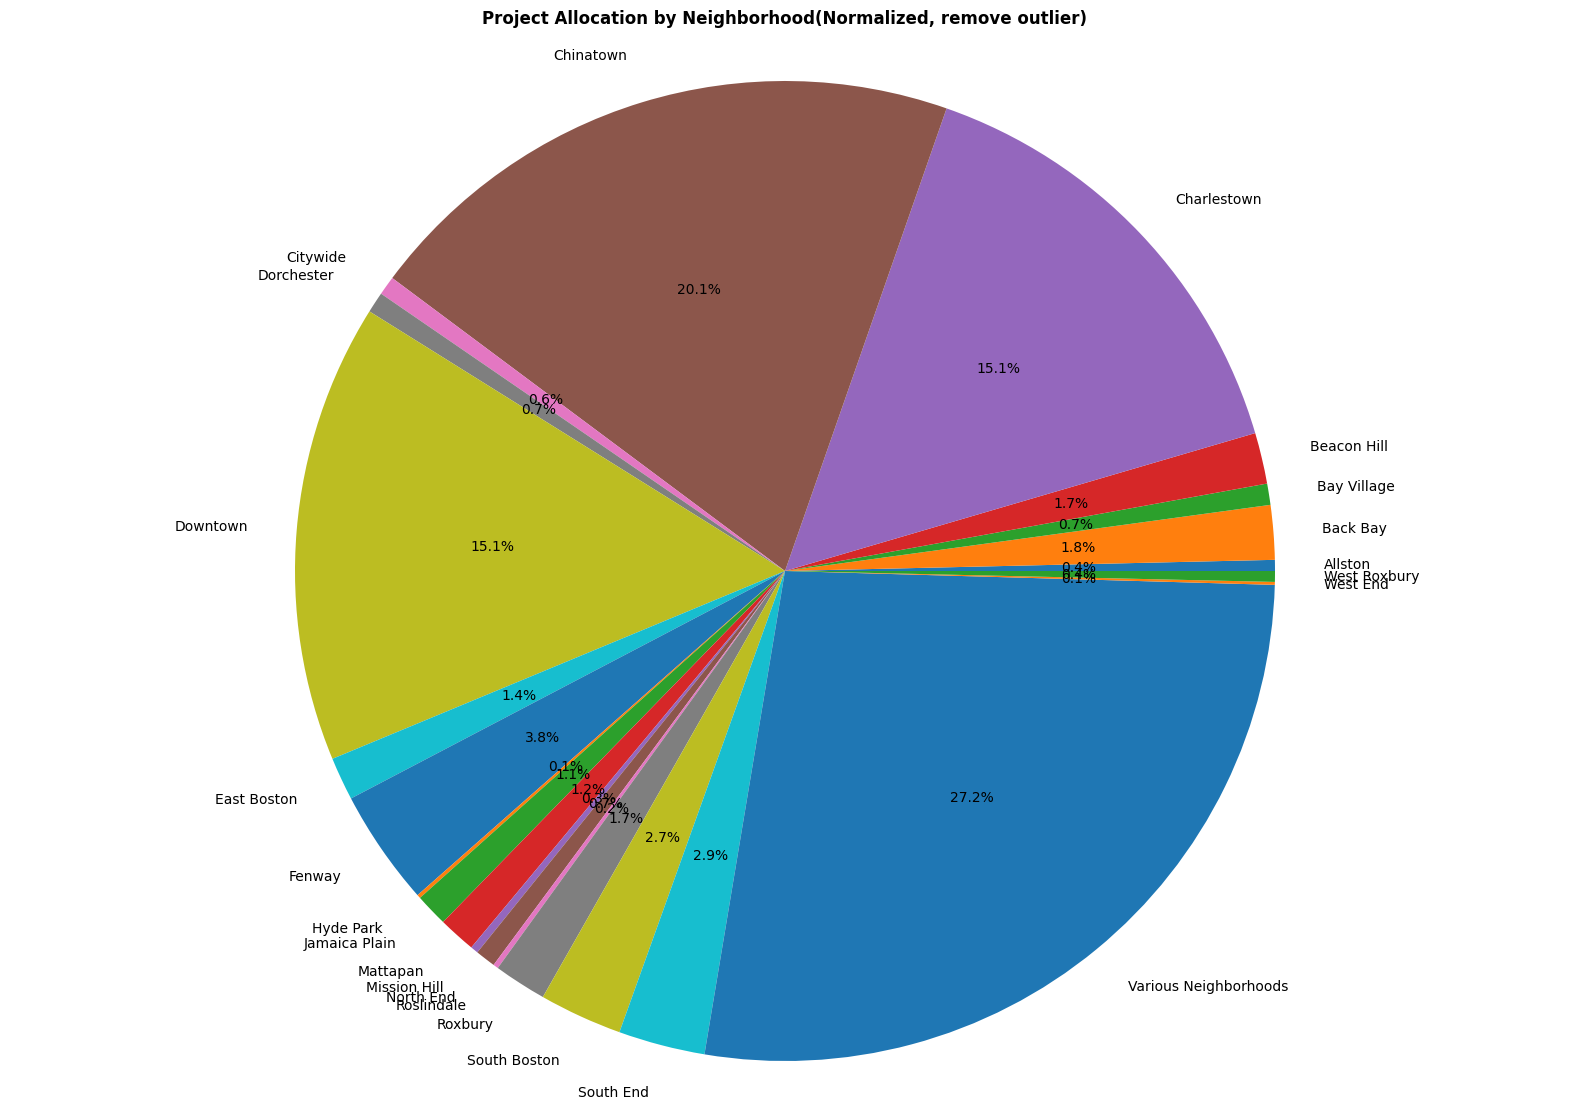

In [52]:
labels = df_count["Neighborhood"]
total_sum = df_count["Normalized_Sum"].sum()
df_count["ProjectProp"] = df_count["Normalized_Sum"]/total_sum
sizes = df_count["ProjectProp"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.set_title("Project Allocation by Neighborhood(Normalized, remove outlier)", fontweight ='bold')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()
plt.show()

In [124]:
temp = df.where(df["Neighborhood"] == "Various neighborhoods").dropna()
temp["Neighborhood"] = "Various Neighborhoods"
df.merge(temp, how='inner')
df.head()


Empty DataFrame
Columns: [Department, Project_Name, Scope_Of_Work, PM_Department, Project_Status, Neighborhood, Authorization_Existing, Authorization_FY, Authorization_Future, Grant_Existing, GO_Expended, Capital_Year_0, CapitalYear_1, Capital_Year_25, Grant_Expended, Grant_Year_0, Grant_Year_1, GrantYear_25, External_Funds, Total_Project_Budget]
Index: []

In [112]:
temp = df.where(df["Department"] == "Property Management Department").dropna()
temp.sum()


Department                  Property Management DepartmentProperty Managem...
Project_Name                201 Rivermoor26 Court StreetCity Hall and City...
Scope_Of_Work               Install new backup generator and high density ...
PM_Department               Public Facilities DepartmentPublic Facilities ...
Project_Status              In DesignIn DesignIn ConstructionIn DesignIn D...
Neighborhood                West RoxburyFinancial District/DowntownGovernm...
Authorization_Existing      2,160,00040,000,000110,300,0002,200,00029,000,...
Authorization_FY             -   80,000,000 -    -   11,000,0009,375,000 -...
Authorization_Future         -    -    -    -    -    -    -    -    -    ...
Grant_Existing               -    -   23,273 -    -    -    -    -    -   ...
GO_Expended                  -    -   48,358,795 -    -   795,214 -    -  ...
Capital_Year_0               -   3,000,00038,821,447100,000300,0002,000,00...
CapitalYear_1               50,00011,000,00013,000,000500,0002,5

In [50]:
import folium
import geopandas as gpd
boston_map = folium.Map(location=[42.329143, -71.076449], zoom_start=11)
# boston_map.choropleth(
#     geo_data=geoboston
# )
boston_map

In [6]:
geoboston=gpd.read_file('boston-neighborhoods.json')

In [32]:
print(df_count)

                      Neighborhood  Projects_Sum  Population  Normalized_Sum
0                 Allston/Brighton      46360000       76951      602.461307
1                         Back Bay      58293934       19588     2976.002348
2                      Bay Village       1525000        1312     1162.347561
3                      Beacon Hill      26100000        9336     2795.629820
4                      Charlestown     479502390       19120    25078.576883
5                        Chinatown     238872172        7143    33441.435251
6                         Citywide     680174651      654776     1038.789832
7                       Dorchester     139578681      122191     1142.299196
8                      East Boston     101632890       43066     2359.933358
9                   Fenway/Kenmore     239348258       37733     6343.207749
10     Financial District/Downtown     128850000       13451     9579.213441
11  Government Center/Faneuil Hall     209323273       13451    15561.911605

In [33]:
df_count.at[0,'Neighborhood']='Allston'
df_count.at[9,'Neighborhood']='Fenway'
df_count.at[10,'Neighborhood']='Downtown'
df_count.at[11,'Neighborhood']='Downtown'

In [34]:
df_count = df_count.groupby('Neighborhood', as_index=False).sum()
print(df_count)

             Neighborhood  Projects_Sum  Population  Normalized_Sum
0                 Allston      46360000       76951      602.461307
1                Back Bay      58293934       19588     2976.002348
2             Bay Village       1525000        1312     1162.347561
3             Beacon Hill      26100000        9336     2795.629820
4             Charlestown     479502390       19120    25078.576883
5               Chinatown     238872172        7143    33441.435251
6                Citywide     680174651      654776     1038.789832
7              Dorchester     139578681      122191     1142.299196
8                Downtown     338173273       26902    25141.125046
9             East Boston     101632890       43066     2359.933358
10                 Fenway     239348258       37733     6343.207749
11         Harbor Islands     134396224         401   335152.678304
12              Hyde Park       6520000       33009      197.521888
13          Jamaica Plain      73850000       41

In [46]:
df_count.describe()

Projects_Sum     Population  Normalized_Sum
count  2.400000e+01      24.000000       24.000000
mean   1.466231e+08   57994.083333    20880.216503
std    1.710563e+08  129842.220223    68016.981933
min    1.525000e+06     401.000000      158.423371
25%    2.256875e+07   16115.750000      929.707701
50%    8.774144e+07   29379.500000     2204.172645
75%    2.080793e+08   43173.500000     5142.513050
max    6.801747e+08  654776.000000   335152.678304

In [45]:
folium.Choropleth(
    geo_data=geoboston,
    name="choropleth",
    data=df_count,
    columns=["Neighborhood", "Normalized_Sum"],
    key_on='feature.properties.Name',
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=.2,
    legend_name="Project Allocation Sum(Normalized)",
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)

boston_map

In [41]:
folium.Choropleth(
    geo_data=geoboston,
    name="choropleth",
    data=df_count,
    columns=["Neighborhood", "Projects_Sum"],
    key_on='feature.properties.Name',
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=.2,
    legend_name="Project Allocation Sum",
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)

boston_map

In [47]:
df_count = df_count.drop(labels=11, axis=0)
print(df_count)

             Neighborhood  Projects_Sum  Population  Normalized_Sum
0                 Allston      46360000       76951      602.461307
1                Back Bay      58293934       19588     2976.002348
2             Bay Village       1525000        1312     1162.347561
3             Beacon Hill      26100000        9336     2795.629820
4             Charlestown     479502390       19120    25078.576883
5               Chinatown     238872172        7143    33441.435251
6                Citywide     680174651      654776     1038.789832
7              Dorchester     139578681      122191     1142.299196
8                Downtown     338173273       26902    25141.125046
9             East Boston     101632890       43066     2359.933358
10                 Fenway     239348258       37733     6343.207749
12              Hyde Park       6520000       33009      197.521888
13          Jamaica Plain      73850000       41012     1800.692480
14               Mattapan      48821850       23

In [51]:
folium.Choropleth(
    geo_data=geoboston,
    name="choropleth",
    data=df_count,
    columns=["Neighborhood", "Normalized_Sum"],
    key_on='feature.properties.Name',
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=.2,
    legend_name="Project Allocation Sum",
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)

boston_map